# Toss Some Data to Your Witcher

The purpose of this jupyter notebook is to perform exploratory data analysis and sentiment analysis on the first five episodes of "the Witcher" season 1 (through episodes 1 to 5).

In [82]:
# Import Packages 

import pandas as pd
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob # for sentiment analysis
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# Load Dataset

df = pd.read_csv('witcher.csv',encoding='utf-8')

In [84]:
# Provides Concise Summary of our Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 2 columns):
Character    1478 non-null object
Text         1478 non-null object
dtypes: object(2)
memory usage: 23.2+ KB


In [85]:
# Remove Characters that don't fit to the top 15 characters in lines

removelst = df.Character.value_counts().iloc[15:].index.tolist()
for name in removelst:
    df = df[df['Character'] != name]

# Which character has the most lines?

Text(0.5, 1.0, 'the Witcher: Character Line Count')

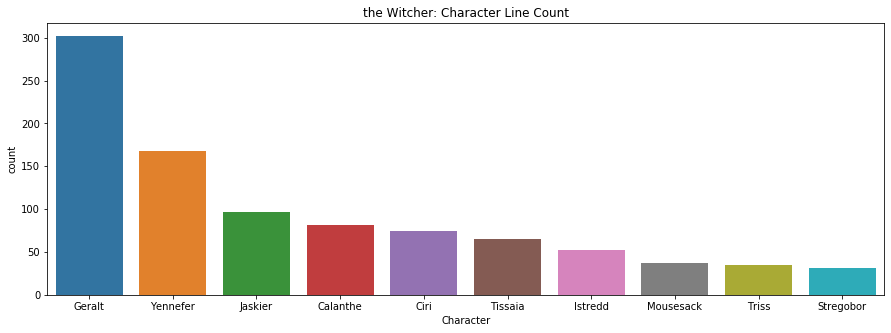

In [86]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Character', data = df, order = df.Character.value_counts().iloc[:10].index)
plt.title('the Witcher: Character Line Count')

# Which character uses the most words on average?

In [87]:
# Create Word Count Column

df['word_count'] = df['Text'].str.split().str.len()

Text(0.5, 1.0, 'the Witcher: Average Character Word Counts')

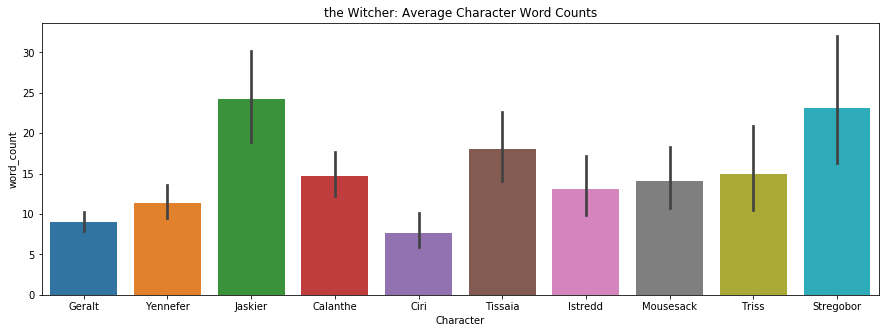

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(x='Character',y='word_count',data=df, order = df.Character.value_counts().iloc[:10].index)
plt.title('the Witcher: Average Character Word Counts')

# Which character uses the most words in total?

In [89]:
total_sum = df.groupby(['Character'])['word_count'].sum().reset_index()

In [90]:
total_sum = total_sum.sort_values(by='word_count', ascending=False)

Text(0.5, 1.0, 'the Witcher: Total Character Word Counts')

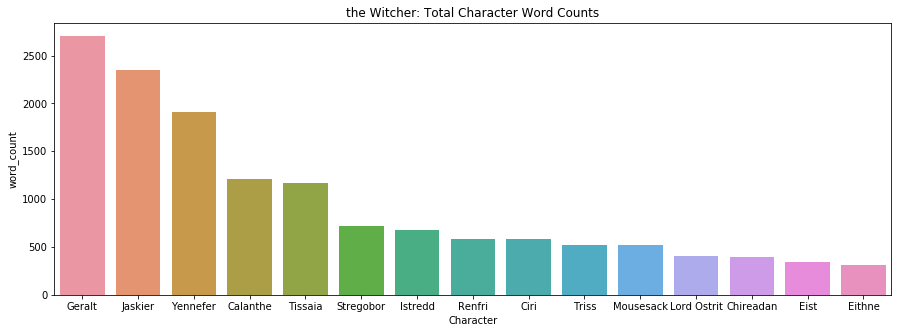

In [91]:
plt.figure(figsize=(15,5))
sns.barplot(x='Character',y='word_count',data=total_sum)
plt.title('the Witcher: Total Character Word Counts')

In [92]:
# Clean and Normalize Text
# - tokenize
# - lowercase
# - remove punctuation
# - remove alphanumeric characters
# - remove stopwords

stopwords = set(stopwords.words('english'))

def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text]
    punct = str.maketrans('', '', string.punctuation) 
    text = [word.translate(punct) for word in text] 
    text = [word for word in text if word.isalpha()]
    text = [word for word in text if not word in stopwords]
    return " ".join(text)

df['clean_text'] = df['Text'].apply(clean)

In [93]:
# Create Word Count Column for Clean Text

df['clean_word_count'] = df['clean_text'].str.split().str.len()

# Total Words vs Clean Words

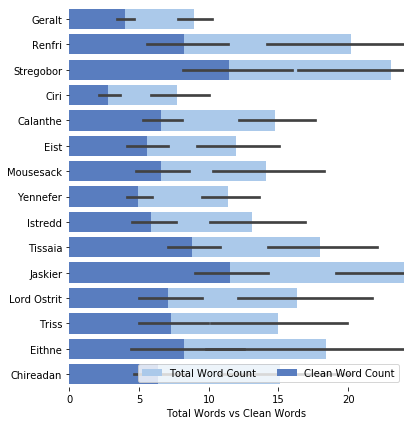

In [94]:
f, ax = plt.subplots(figsize=(6, 7))

sns.set_color_codes("pastel")
sns.barplot(x="word_count", y="Character", data=df,
            label="Total Word Count", color="b")

sns.set_color_codes("muted")
sns.barplot(x="clean_word_count", y="Character", data=df,
            label="Clean Word Count", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Words vs Clean Words")
sns.despine(left=True, bottom=True)

In [95]:
# Apply Sentiment Polarity to Text with TextBlob

df['polarity'] = [round(TextBlob(word).sentiment.polarity, 2) for word in df['clean_text']]
df['sentiment'] = ['positive' if polarity > 0 
                             else 'negative' if polarity < 0 
                                 else 'neutral' 
                                     for polarity in df['polarity']]


# What is the sentiment of our character's lines

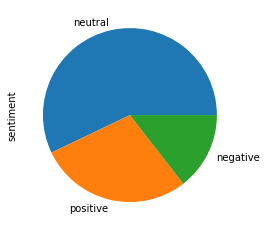

In [96]:
df.sentiment.value_counts().plot(kind='pie')

Text(0.5, 1.0, 'the Witcher: Character Clean Text Sentiment')

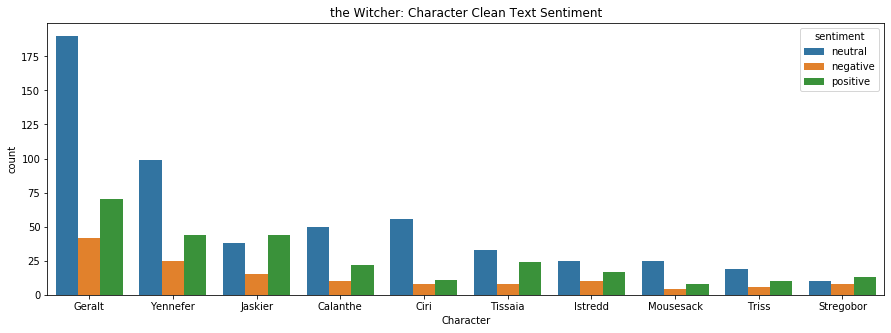

In [97]:
plt.figure(figsize=(15,5))
sns.countplot(x='Character',hue='sentiment',data=df,order=df.Character.value_counts().iloc[:10].index)
plt.title('the Witcher: Character Clean Text Sentiment')

In [98]:
# Build a counter function to count words

def counter(text):
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

In [99]:
# Isolate Geralt's Lines and use Counter to determine the Most Common Words

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

geralt = df.groupby('Character')
geralt = geralt.get_group(('Geralt'))
geralt['clean_text'] = geralt['clean_text'].apply(lambda x: word_tokenize(x))
text_cnt = counter(geralt['clean_text'])
j = text_cnt.most_common()

# What are Geralt's Most Common Words

Text(0.5, 1.0, "Geralt's Most Common Words")

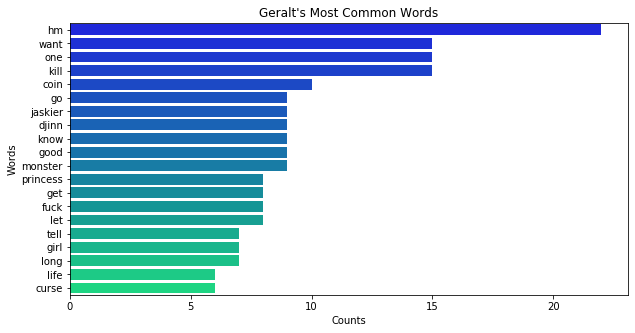

In [100]:
j = pd.DataFrame(j, columns = ['Words', 'Counts'])
j = j.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("winter", len(j))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=j, palette=colors)
plt.title('''Geralt's Most Common Words''')

In [101]:
# Now let's check out Jaskier, Ciri and Yennefer's Most Common Words

jaskier = df.groupby('Character')
jaskier = jaskier.get_group(('Jaskier'))
jaskier['clean_text'] = jaskier['clean_text'].apply(lambda x: word_tokenize(x))
jaskier_cnt = counter(jaskier['clean_text'])

ciri = df.groupby('Character')
ciri = ciri.get_group(('Ciri'))
ciri['clean_text'] = ciri['clean_text'].apply(lambda x: word_tokenize(x))
ciri_cnt = counter(ciri['clean_text'])

yennefer = df.groupby('Character')
yennefer = yennefer.get_group(('Yennefer'))
yennefer['clean_text'] = yennefer['clean_text'].apply(lambda x: word_tokenize(x))
yennefer_cnt = counter(yennefer['clean_text'])

j = jaskier_cnt.most_common()
c = ciri_cnt.most_common()
y = yennefer_cnt.most_common()


# What are Jaskier's Most Common Words

Text(0.5, 1.0, "Jaskier's Most Common Words")

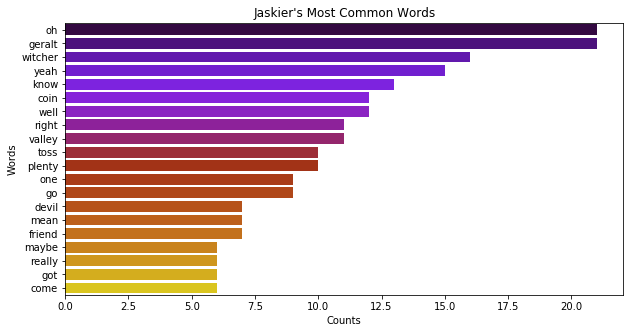

In [102]:
j = pd.DataFrame(j, columns = ['Words', 'Counts'])
j = j.sort_values(by='Counts', ascending=False)[:20]
colors = sns.color_palette("gnuplot", len(j))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=j, palette=colors)
plt.title('''Jaskier's Most Common Words''')

# What are Ciri's Most Common Words

Text(0.5, 1.0, "Ciri's Most Common Words")

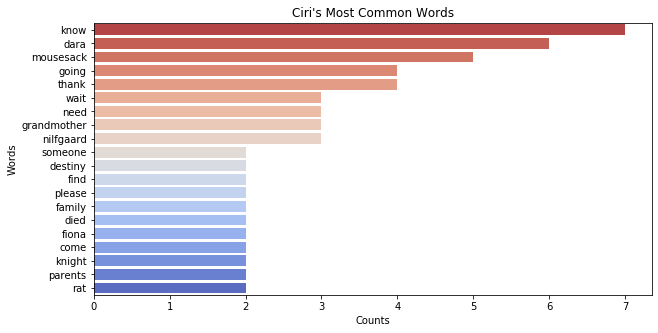

In [103]:
c = pd.DataFrame(c, columns = ['Words', 'Counts'])
c = c.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("coolwarm_r", len(c))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=c, palette=colors)
plt.title('''Ciri's Most Common Words''')

# What are Yennefer's Most Common Words

Text(0.5, 1.0, "Yennefer's Most Common Words")

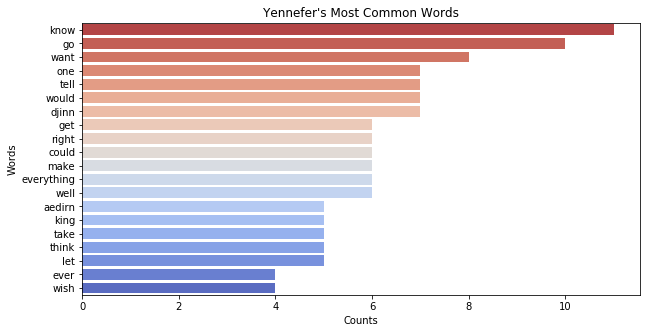

In [104]:
y = pd.DataFrame(y, columns = ['Words', 'Counts'])
y = y.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("coolwarm_r", len(y))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=y, palette=colors)
plt.title('''Yennefer's Most Common Words''')